<a href="https://colab.research.google.com/github/rezaafra/hcin620/blob/master/robust_physics_pdf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.style.use('seaborn')

<ipython-input-59-1584ad0fb04d>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [44]:
PATH = "/content/COMPARE_OFFSET S21_Closed Cyl_Q Variation_20Dce22.xlsx"

In [45]:
data = pd.read_excel(PATH, sheet_name="|S21|^2",header = None, usecols=list(range(601)))

In [46]:
df = data.copy()

In [47]:
df.shape

(1604, 601)

In [48]:
df = df.iloc[3:,:]
freq = df.iloc[:,0]

In [49]:
df.iloc[:, 0] = df.iloc[:,0]/10**9 

In [50]:
samples = [np.array(df.iloc[598:619,i:i+50].stack(), dtype="float64") for i in range(1, 552, 50)] 

In [51]:
def get_params(sample):
  beta = 2 + np.mean(sample)**2 / np.var(sample)
  alpha = np.mean(sample) * (beta - 1)

  return alpha, beta 

In [52]:
alpha, beta = get_params(samples[0])
alpha, beta

(0.5074613152584283, 3.6365536585781997)

In [53]:
def plot_ecdf(s, alpha, beta):
  plt.plot(np.sort(s), np.linspace(0, 1, len(s), endpoint=False), label = "Empirical CDF")
  plt.plot(np.sort(s), 1 - (1 + np.sort(s)/ alpha ) ** (-beta), label = "Theoretical")
  plt.legend()
  plt.show()

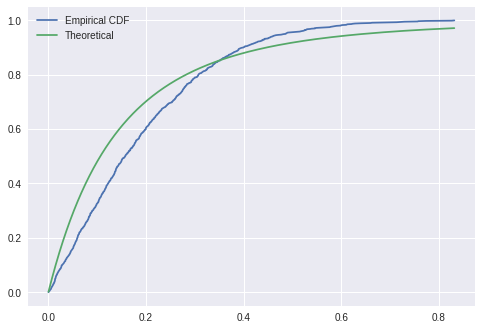

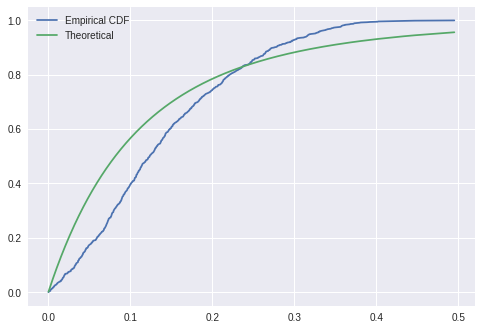

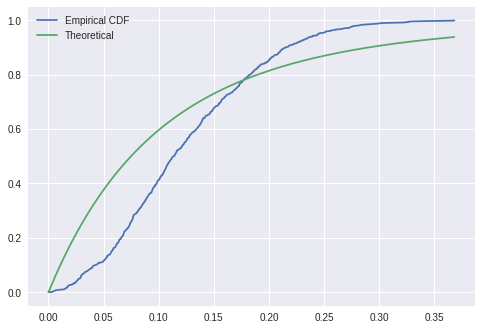

In [60]:
for i, s in enumerate(samples):
  indices = [0, 5, 11]
  if i in indices: 
    alpha, beta = get_params(s)
    plot_ecdf(s, alpha, beta)

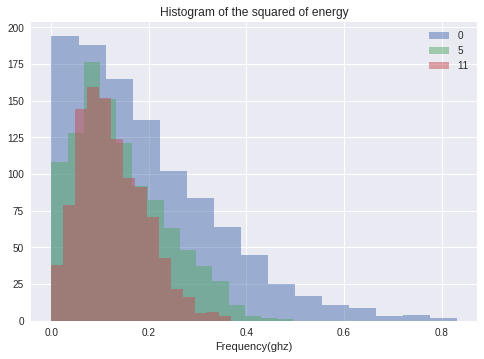

In [61]:
for i, s in enumerate(samples):
  indices  = [0,5,11]
  if i in indices: 
    plt.hist(s, bins=15, alpha = 0.5,label = f'{i}');
plt.title('Histogram of the squared of energy')
plt.xlabel('Frequency(ghz)')
plt.legend() 

In [14]:
for s in samples:
  variances = np.array([np.var(s) for s in samples])
  means = np.array([np.mean(s) for s in samples])

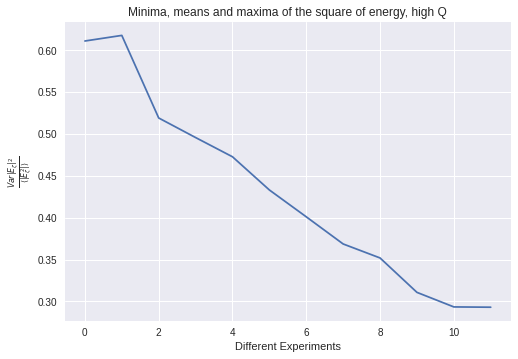

In [62]:
plt.plot(variances/means ** 2)

plt.xlabel('Different Experiments')
plt.ylabel(r'$\frac{{Var|E_{\zeta}|^2}}{\langle|E_{\zeta}^2|\rangle}$')
plt.title('Minima, means and maxima of the square of energy, high Q')
plt.show()

In [63]:
all_freq_samples = [df.iloc[:,i:i+50] for i in range(1, 552, 50)] 

In [64]:
all_freq_samples[0].shape

(1601, 50)

In [65]:
def calculate_stats(s):
  mean = s.mean(axis=1)
  min_ = s.min(axis=1)
  max_ = s.max(axis=1)

  return mean, min_, max_ 

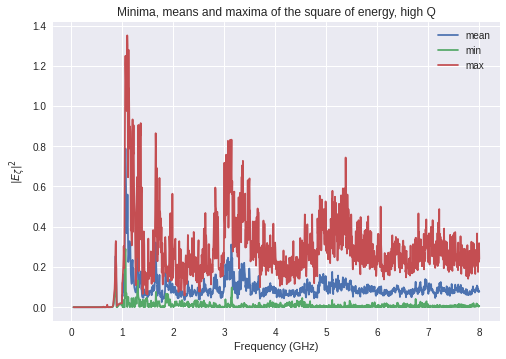

In [66]:
plt.plot(freq, calculate_stats(all_freq_samples[0])[0], label = 'mean')
plt.plot(freq, calculate_stats(all_freq_samples[0])[1], label = 'min')
plt.plot(freq, calculate_stats(all_freq_samples[0])[2], label = 'max')
plt.legend()
plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$|E_{\zeta}|^2$')
plt.title('Minima, means and maxima of the square of energy, high Q')
plt.show()

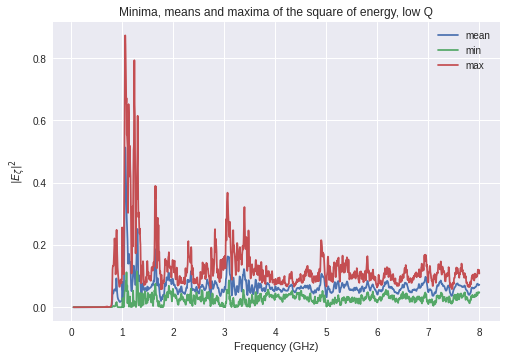

In [67]:
plt.plot(freq, calculate_stats(all_freq_samples[11])[0], label = 'mean')
plt.plot(freq, calculate_stats(all_freq_samples[11])[1], label = 'min')
plt.plot(freq, calculate_stats(all_freq_samples[11])[2], label = 'max')
plt.legend()
plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$|E_{\zeta}|^2$')
plt.title('Minima, means and maxima of the square of energy, low Q')
plt.show()

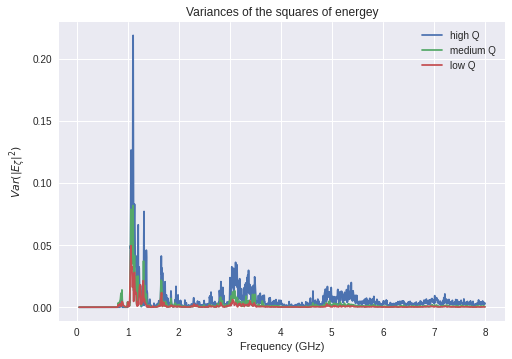

In [68]:

plt.plot(freq, all_freq_samples[0].var(axis=1), label='high Q');
plt.plot(freq, all_freq_samples[5].var(axis=1), label='medium Q');
plt.plot(freq, all_freq_samples[11].var(axis=1), label='low Q');
plt.legend()
plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$Var(|E_{\zeta}|^2)$')
plt.title('Variances of the squares of energey')
plt.show()